# A Supervised Learning Framework

In this notebook we will establish a common theoretical framework for supervised learning problems.

## What we will accomplish

In particular we will
- More rigorously define the setup of a supervised learning problem,
- Give a basic outline of how to approach such a problem and
- Discuss predictive and explanatory modeling.

## The framework

Suppose we have something we would like to predict, which we will call the outcome variable denoted $y$. We also have a data set we want to use to predict $y$, called the <i>feature set</i> or <i>input set</i> and often denoted as $X$. In a supervised learning problem we will assume that there is some kind of relationship between $y$ and $X$ which takes the form of a statistical model: 

$$
y = f(X) + \epsilon,
$$

where $f: \mathbb{R}^m \rightarrow \mathbb{R}$ is some function that we wish to approximate. $f(X)$ is considered the <i>systematic</i> information that $X$ gives about $y$, and can be considered the <i>signal</i> that $X$ provides about $y$. $\epsilon$ is some kind of random noise independent of $X$ (the specific kind of noise depends on the problem we are working on).

## An illustration

It may be useful to see this spelled out with pictures.

<i>Note I will be using python to generate these pictures. While the code I use should largely be familiar to those that went through the `Python Prep` materials, it is not necessary to focus on how the code works for this notebook.</i>

Suppose $X$ is $1$-dimensional and that we have a very simple relationship between $y$ and $X$, say $f(X)=X$:

$$
y = X + \epsilon,
$$

where $\epsilon \sim N(0, \sigma)$. 

Then our systematic part, or assumed underlying relationship looks like this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")


## This is new, ignore it for now!
from sklearn.linear_model import LinearRegression

In [2]:
## creating data
## remember that np.linspace makes an evenly spaced array
## between the first two inputs, the number of steps is determined
## by the last input
## so X_systematic is 1000 evenly spaced steps from -5 to 5
X_systematic = np.linspace(-5, 5, 1000)
y_systematic = X_systematic

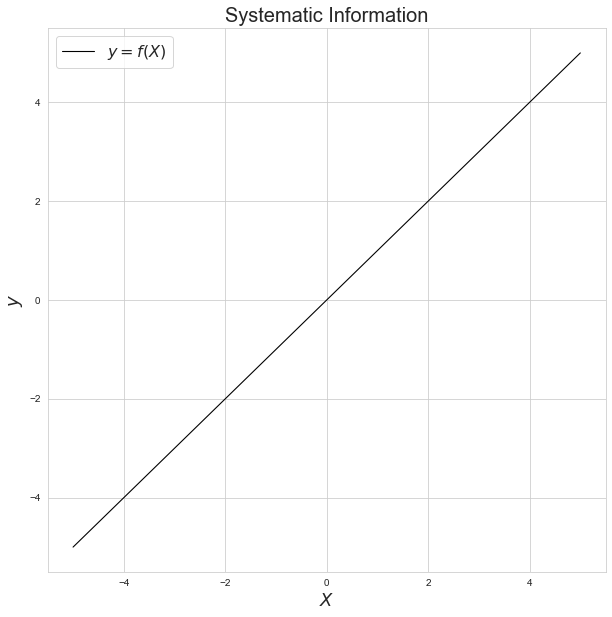

In [3]:
## Plotting data

## Make a figure
plt.figure(figsize=(10,10))

## plot X and y
plt.plot(X_systematic, 
         y_systematic, 
         'k-', 
         linewidth=1.1,
         label="$y=f(X)$")

## Make labels
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.legend(fontsize=16)
plt.title("Systematic Information", fontsize=20)

plt.show()

In order to estimate $f$ we have to go out into the world and collect data, which is sometimes called an <i>observation</i> or a <i>sample</i>. 

Let's say we collect $100$ observations.

In [4]:
## "Gathering" the data
## First we draw 100 times from a random uniform dist.
## going from -5 to 5 for X
X_obs = 10*np.random.random(100)-5

## y = f(X) + epsilon
## here epsilon is a random normal with variance 3
y_obs = X_obs + 3*np.random.randn(100)

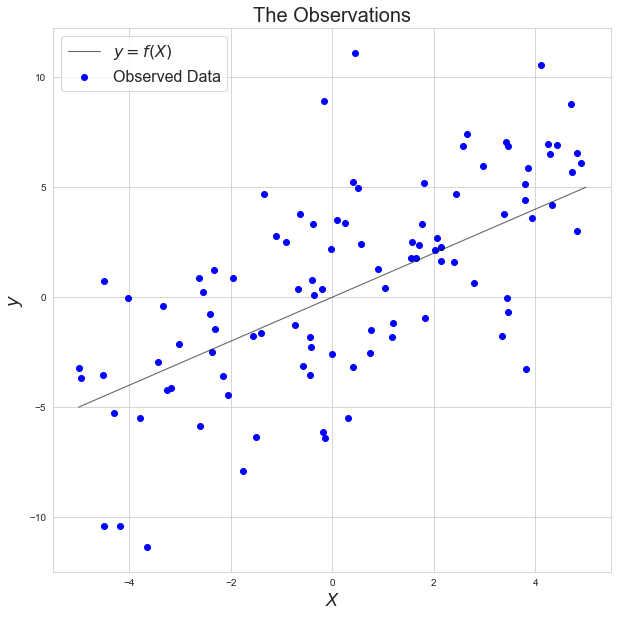

In [5]:
## Plotting data

## Make a figure
plt.figure(figsize=(10,10))

## Plot the "truth"
plt.plot(X_systematic, 
         y_systematic, 
         'k-', 
         linewidth=1.1,
         label="$y=f(X)$",
         alpha=.6)

## Plot the observations
plt.scatter(X_obs, 
             y_obs, 
             c='b', 
             label="Observed Data")

## Make labels
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.legend(fontsize=16)
plt.title("The Observations", fontsize=20)

plt.show()

We then use these observations to "train" an algorithm that produces an estimate of $f$. Often we will train a variety of models and choose the one that performs "best", where what best means depends on the particular problem. 

In this illustration we will use an algorithm called linear regression.

<i>Again, it's okay if you do not know or understand the following python code. We will cover it in a later notebook</i>.

In [6]:
## Training the algorithm
## It is okay to not understand this code yet. 
## We will do a much deeper dive soon!
reg = LinearRegression(copy_X = True)

reg.fit(X_obs.reshape(-1,1), y_obs)

y_pred = reg.predict(X_systematic.reshape(-1,1))

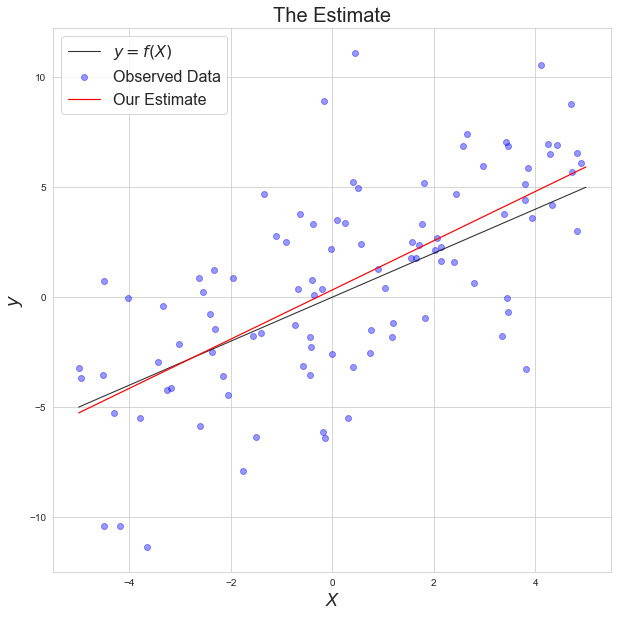

In [7]:
## Plotting data

## Make a figure
plt.figure(figsize=(10,10))

## Plot the "truth"
plt.plot(X_systematic, 
         y_systematic, 
         'k-', 
         linewidth=1.1,
         label="$y=f(X)$",
         alpha=.8)

## Plot the observations
plt.scatter(X_obs, 
             y_obs, 
             c='b', 
             label="Observed Data",
             alpha = .4)

## Plot the "estimate"
plt.plot(X_systematic, 
         y_pred, 
         'r-', 
         linewidth=1.2,
         label="Our Estimate")

## Make labels
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.legend(fontsize=16)
plt.title("The Estimate", fontsize=20)

plt.show()

We can notice that the estimate, usually denoted as $\hat{f}$, is not precisely the same as $f$ but it is quite close.

### What is meant by "close"?

In our particular example "close" is taken to be an estimate with low <i>mean square error</i> (more on that soon), but the particular measure of closeness depends on the problem type as well as the modeling goal. 

## Two main supervised learning modeling goals

We typically adopt this supervised modeling framework with two goals in mind:

1. <b>Making predictions</b> - producing a model/algorithm using training data that can take in new observations and predict an output for them, the goal here is to make the best predictions possible, i.e. the ones that are closest to the actual values,
2. <b>Making inferences</b> - producing a model that helps explain the relationship, if any, between $y$ and $X$. In this setting the goal is to understand how changes in $X$ impact $y$. One example of the "best" estimate in this setting is finding the model the explains as much of the variance in $y$ while still being parsimonious.

In these notes we will tend to focus on goal 1., but will touch on goal 2. at times. 

We should also note that these goals do not always result in the same model. The model that provides the best predictions may not also be the model with the best explanatory power. As an example consider the winning team from the Netflix prize competition. When coming up with their winning solution, BellKor's Pragmatic Chaos team decided to leave out features that helped explain user behavior:

<blockquote>
"We should mention that not all data features were found to be useful. For example, we tried to benefit from an extensive set of attributes describing each of the movies in the dataset. Those attributes certainly carry a significant signal and can explain some of the user behavior. However, we concluded that they could not help at all for improving the accuracy of well tuned collaborative filtering models."
</blockquote>

Notably, while we will primarily focus on predictive modeling, both approaches play an important role in data science and research.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)